# Tweet Sentiment Classifiers
<h4>Blake Rayvid - <a href=https://github.com/brayvid>https://github.com/brayvid</a></h4></br>
<h4>Dataset 1: <a href="https://www.kaggle.com/datasets/kazanova/sentiment140">https://www.kaggle.com/datasets/kazanova/sentiment140</a></h4>
<h4>Dataset 2: <a href="https://www.kaggle.com/datasets/yasserh/twitter-tweets-sentiment-dataset">https://www.kaggle.com/datasets/yasserh/twitter-tweets-sentiment-dataset</a> ⬅ better data in <code>selected_text</code> column</h4>

# Business problem
<h3><u>Brand reputation management</u></h3>
<h5>Being able to correctly classify new tweets by sentiment (positive, negative, neutral) allows a company to monitor the overall perception of their brand in the public domain.</h5>
<ul>
<li>Analyze negative feedback for insights into product weaknesses and use this to drive improvements.
<li>Identify accounts with consistent positive sentiment and offer to collaborate.
<li>Time launches of new products during periods of high positive sentiment.
</ul>


# Imports

In [19]:
!pip install umap-learn
!pip install datashader
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt; plt.rcParams["figure.dpi"] = 144
import seaborn as sns


from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
import umap, datashader, bokeh, holoviews, umap.plot
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, ConfusionMatrixDisplay

from wordcloud import WordCloud
from matplotlib.patches import Patch

# Dataset 1 (two classes) - initialize df here
<a href="https://www.kaggle.com/datasets/kazanova/sentiment140">https://www.kaggle.com/datasets/kazanova/sentiment140</a>

In this dataset, 4 represents positive sentiment and 0 represents negative sentiment. Those are the only two classes.

In [20]:
# filepath = 'training.1600000.processed.noemoticon.csv'
# df = pd.read_csv(filepath,encoding='latin-1',header=None)
# df.head()

In [21]:
# Take a smaller sample and save it
# df_sample = df.sample(n=10000, random_state=42)
# df_sample.to_csv('sentiment140_10000.csv',index=False)

In [22]:
cols = ['etc1','sentiment','id','date','etc2','username','text']

In [126]:
# N=10,000
df_sample = pd.read_csv('sentiment140_10000.csv', names=cols, header=0)
df_sample.sample(10,random_state=42)[['sentiment','text']]

,sentiment,text
6252,0,finished the stop motion... now it won't upload
4684,4,i get to see muh daddy today
1731,0,"Ok cats, we're having trouble keeping the came..."
4742,4,Suited and booted in 25C weather isn't terribl...
4521,4,@r0ckcandy Hence your gay friend screaming I L...
6340,4,old strong-willed blended with new spirit yeaa...
576,4,@marcthom that's Jess I bought her with me fro...
5202,0,packed up to leave Chicago don't wanna go ba...
6363,0,No stream for the round table discussion? #ttix
439,0,to many shots of jager...and my boo throwing u...


In [127]:
# # N=50,000
# df_sample = pd.read_csv('sentiment140_50000.csv', names=cols, header=0)
# df_sample.head()

In [128]:
# # N=100,000
# df_sample = pd.read_csv('sentiment140_100000.csv', names=cols, header=0)
# df_sample.head()

In [129]:
tweets = df_sample['text']
labels = df_sample['sentiment']  # 4 for positive, 0 for negative

# Train test split
X_train, X_test, y_train, y_test = train_test_split(tweets, labels, test_size=0.3, random_state=42,stratify=labels)

# Vectorize the tweets
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

## Dataset 1 + Decision Tree (various depth)

Tree depth: 292
Train accuracy: 1.0
Test accuracy: 0.6316666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.61      0.62      1475
           4       0.63      0.65      0.64      1525

    accuracy                           0.63      3000
   macro avg       0.63      0.63      0.63      3000
weighted avg       0.63      0.63      0.63      3000



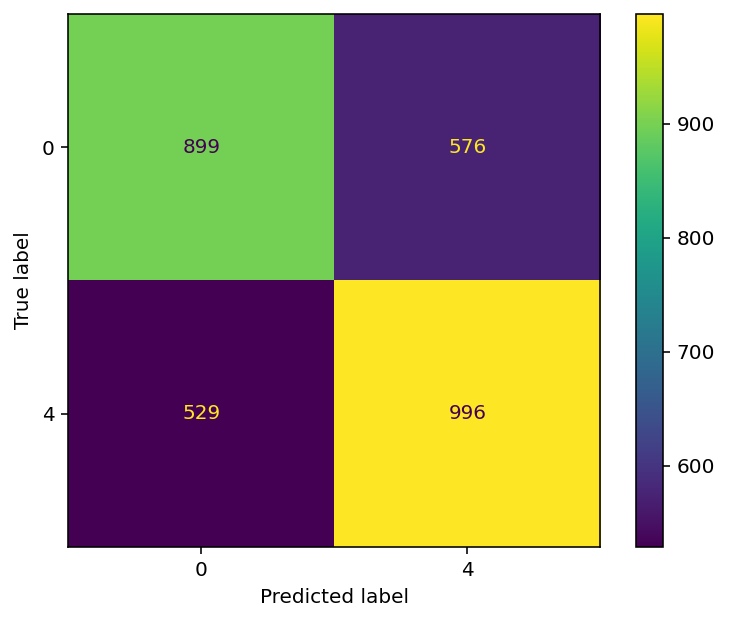

In [27]:
# Training the decision tree
clf = DecisionTreeClassifier() # no depth limit (can be slow)
clf.fit(X_train_vec, y_train)

# Predicting and evaluating
y_pred = clf.predict(X_test_vec)
print("Tree depth:", clf.get_depth())
print("Train accuracy:", clf.score(X_train_vec,y_train))
print("Test accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_estimator(clf, X_test_vec, y_test)
plt.show()

Tree depth: 100
Train accuracy: 0.9387142857142857
Test accuracy: 0.646
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.62      0.64      1496
           4       0.64      0.67      0.65      1504

    accuracy                           0.65      3000
   macro avg       0.65      0.65      0.65      3000
weighted avg       0.65      0.65      0.65      3000



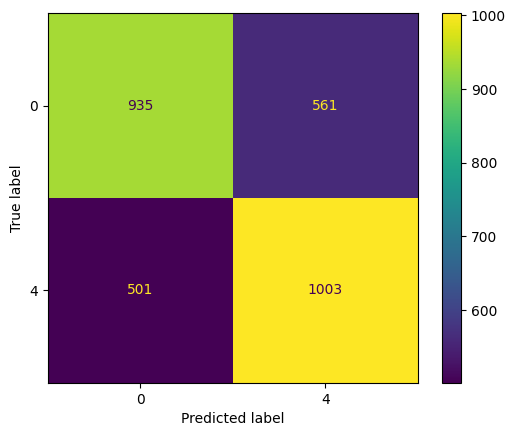

In [132]:
# Training the decision tree
clf = DecisionTreeClassifier(max_depth=100)
clf.fit(X_train_vec, y_train)

# Predicting and evaluating
y_pred = clf.predict(X_test_vec)
print("Tree depth:", clf.get_depth())
print("Train accuracy:", clf.score(X_train_vec,y_train))
print("Test accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_estimator(clf, X_test_vec, y_test)
plt.show()

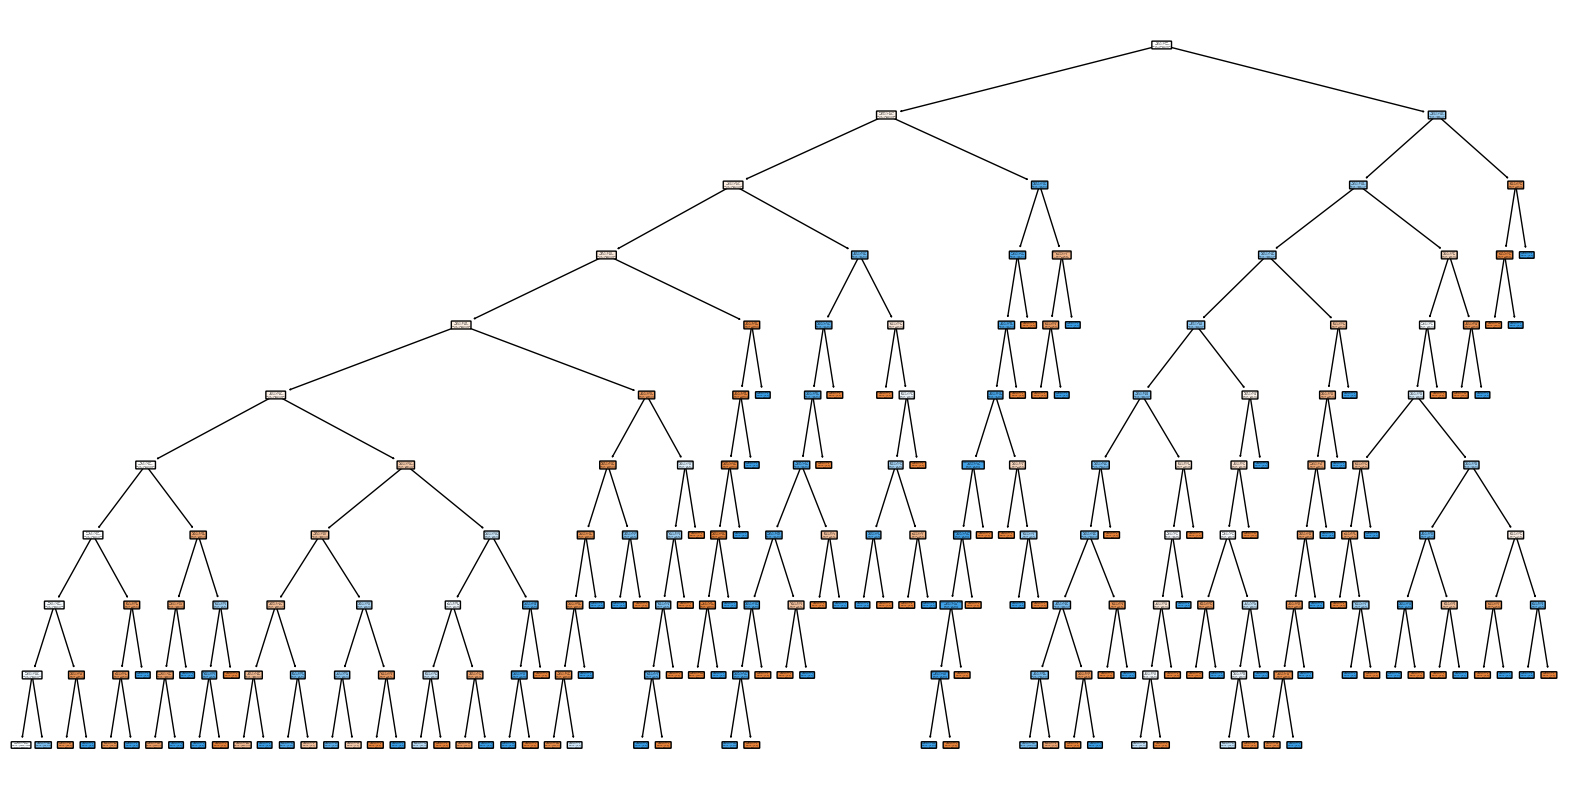

In [131]:
# Plot decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=vectorizer.get_feature_names_out(), class_names=["Negative", "Positive"], rounded=True)
plt.show()

## Dataset 1 + Logistic Regression ⭐️

Train accuracy: 0.8745714285714286
Test accuracy: 0.7376666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.75      0.74      1475
           4       0.75      0.73      0.74      1525

    accuracy                           0.74      3000
   macro avg       0.74      0.74      0.74      3000
weighted avg       0.74      0.74      0.74      3000



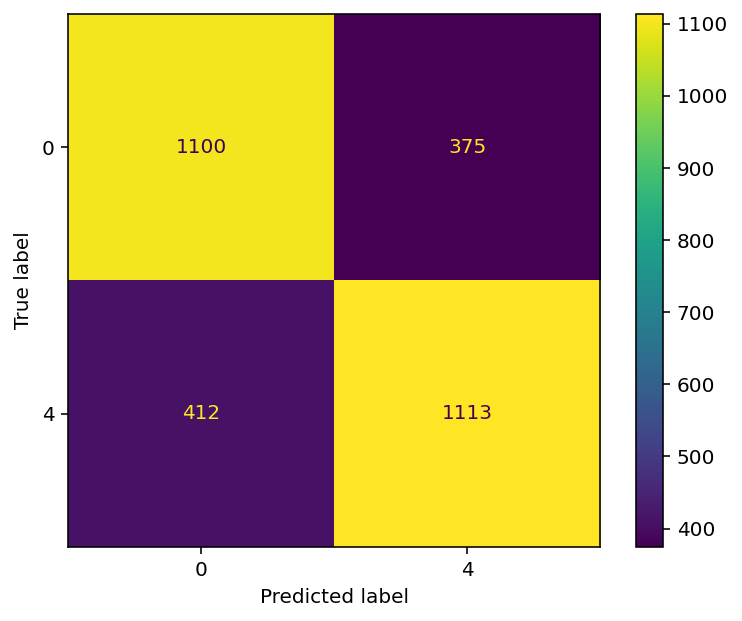

In [30]:
# Train LogReg
clf = LogisticRegression()
clf.fit(X_train_vec, y_train)

# Predicting and evaluating
y_pred = clf.predict(X_test_vec)
# print("Tree depth:", clf.get_depth())
print("Train accuracy:", clf.score(X_train_vec,y_train))
print("Test accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_estimator(clf, X_test_vec, y_test)
plt.show()

## Dataset 1 + Support Vector Classifier

Train accuracy: 0.9858571428571429
Test accuracy: 0.745
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.76      0.75      1475
           4       0.76      0.73      0.74      1525

    accuracy                           0.74      3000
   macro avg       0.75      0.75      0.74      3000
weighted avg       0.75      0.74      0.74      3000



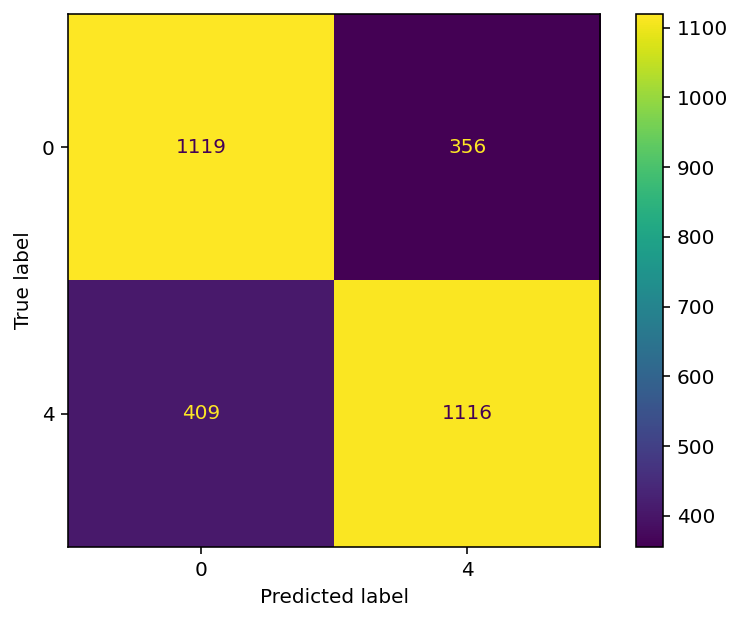

In [31]:
# Train SVC
clf = SVC()
clf.fit(X_train_vec, y_train)

# Predicting and evaluating
y_pred = clf.predict(X_test_vec)

print("Train accuracy:", clf.score(X_train_vec,y_train))
print("Test accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_estimator(clf, X_test_vec, y_test)
plt.show()

# Dataset 2 (three classes) - initialize df here
<a href="https://www.kaggle.com/datasets/yasserh/twitter-tweets-sentiment-dataset">https://www.kaggle.com/datasets/yasserh/twitter-tweets-sentiment-dataset</a>

In this dataset, sentiment has three classes, ```positive```, ```negative```, ```neutral```.

This data also has a column containing the substring of each tweet identified as relevant for sentiment analysis.

In [32]:
df = pd.read_csv('Tweets.csv')
df = df.dropna() # only one row is dropped
df.sample(10, random_state=42)[['sentiment','text','selected_text']]

,sentiment,text,selected_text
1589,positive,Enjoy! Family trumps everything,Enjoy! Family trumps everything
10414,negative,--of them kinda turns me off of it all. And ...,kinda turns me off
6562,neutral,Clive it`s my birthday pat me http://apps.fac...,Clive it`s my birthday pat me
2603,positive,congrats hey,congrats
4004,neutral,is texting,is texting
1570,neutral,Do you have any idea when the (not so) patien...,Do you have any idea when the (not so) patient...
27232,neutral,Tell him where...,Tell him where...
8286,negative,"Ooooh, I`m jealous I might try and get some ...",t I have an exam on the monday that Im gonna fail
580,neutral,OHSHNAPSSS. is she pissed at blair as usual ?...,OHSHNAPSSS. is she pissed at blair as usual ? ...
9189,neutral,wee. done with advance audit paper,wee. done with advance audit paper


In [33]:
labenc = LabelEncoder()
labels = labenc.fit_transform(df['sentiment'])
tweets = df['text']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(tweets, labels, test_size=0.3, random_state=42,stratify=labels)

# Vectorize the tweets
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

## Dataset 2 ("text") + Decision Tree

Tree depth: 100
Train accuracy: 0.8936889166146809
Test accuracy: 0.6191169335274139
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.48      0.54      2356
           1       0.58      0.70      0.63      3343
           2       0.71      0.63      0.67      2545

    accuracy                           0.62      8244
   macro avg       0.63      0.61      0.61      8244
weighted avg       0.63      0.62      0.62      8244



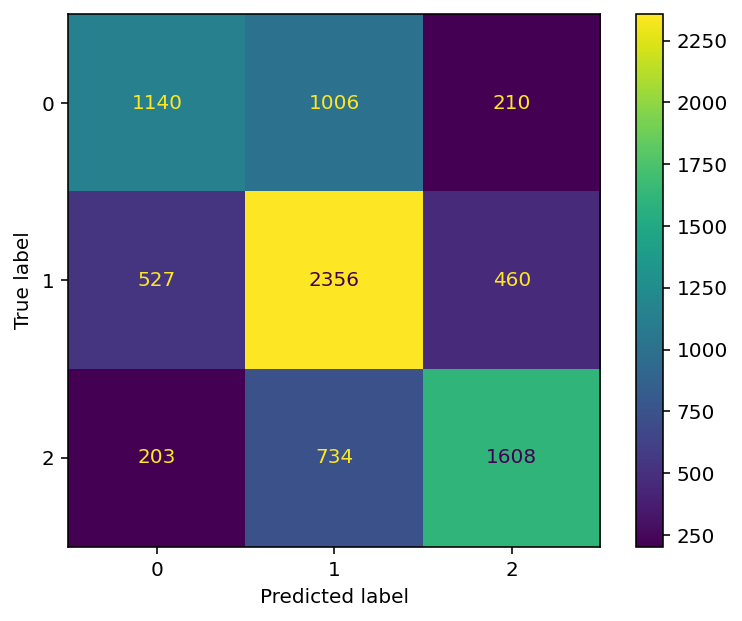

In [34]:
# Train
clf = DecisionTreeClassifier(max_depth=100)
clf.fit(X_train_vec, y_train)

# Predicting and evaluating
y_pred = clf.predict(X_test_vec)
print("Tree depth:", clf.get_depth())
print("Train accuracy:", clf.score(X_train_vec,y_train))
print("Test accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_estimator(clf, X_test_vec, y_test)
plt.show()

## Dataset 2 ("selected_text") + Decision Tree
Using the part of each tweet identifed as relevant.</h4>

In [43]:
labenc = LabelEncoder()
labels = labenc.fit_transform(df['sentiment'])
tweets = df['selected_text']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(tweets, labels, test_size=0.3, random_state=42,stratify=labels)

# Vectorize the tweets
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

Tree depth: 100
Train accuracy: 0.891193595342067
Test accuracy: 0.7076661814653081
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.79      0.67      2334
           1       0.77      0.70      0.73      3335
           2       0.81      0.64      0.72      2575

    accuracy                           0.71      8244
   macro avg       0.72      0.71      0.71      8244
weighted avg       0.73      0.71      0.71      8244



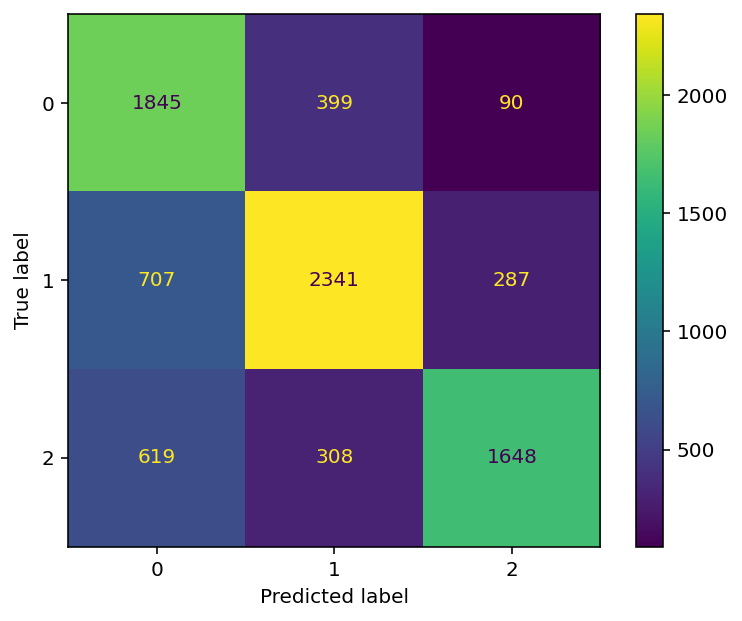

In [45]:
# Training the decision tree
clf = DecisionTreeClassifier(max_depth=100)
clf.fit(X_train_vec, y_train)

# Predicting and evaluating
y_pred = clf.predict(X_test_vec)
print("Tree depth:", clf.get_depth())
print("Train accuracy:", clf.score(X_train_vec,y_train))
print("Test accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_estimator(clf, X_test_vec, y_test)
plt.show()

### Cross validation tuning

In [46]:
def cross_validation(X_train, y_train, k, num_split = 10):

    X_train = X_train.values
    # y_train = y_train.values

    score_train_list = []
    score_val_list = []

    for train_index, valid_index in KFold(n_splits = num_split).split(X_train):

        # train and validation splitting
        X_train_fold, X_val_fold = X_train[train_index], X_train[valid_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[valid_index]

        # Vectorizing the data
        vectorizer = TfidfVectorizer()
        X_train_fold_vec = vectorizer.fit_transform(X_train_fold)
        X_val_fold_vec = vectorizer.transform(X_val_fold)

        # create/fit decision tree
        clf = DecisionTreeClassifier(max_depth = k)
        clf.fit(X_train_fold_vec, y_train_fold)

        # now how did we do?
        accuracy_train = clf.score(X_train_fold_vec, y_train_fold)
        accuracy_val = clf.score(X_val_fold_vec, y_val_fold)
        score_val_list.append(accuracy_val)
        score_train_list.append(accuracy_train)

    return {'k': k, 'train': np.mean(score_train_list), 'validation': np.mean(score_val_list)}

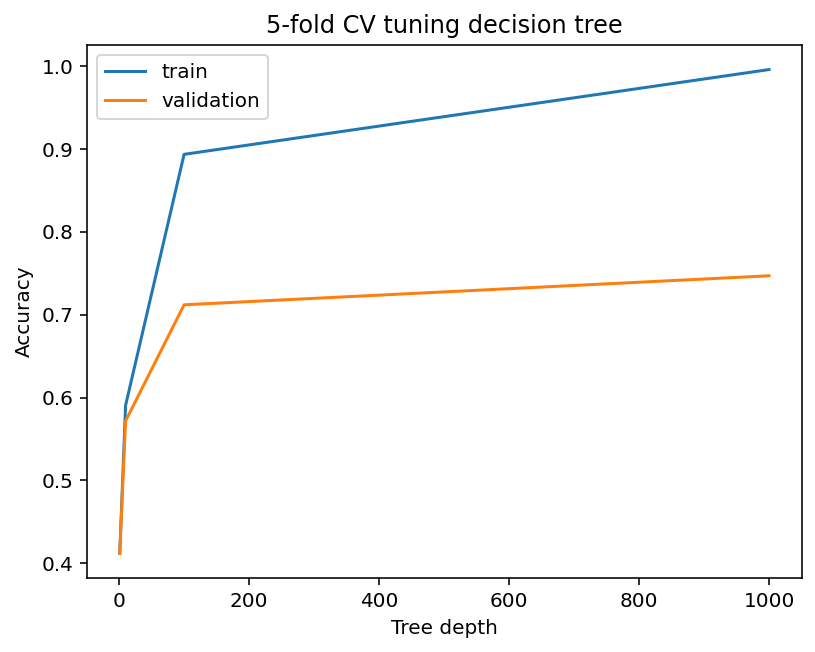

In [47]:
# Append results for each value of k
crossval_list = [pd.Series(cross_validation(X_train, y_train, k, 5)) for k in (np.logspace(0, 3, 4)).astype(int)]
cross_val_df = pd.concat(crossval_list, axis = 1).T

# Plot cross validation results
fig, ax = plt.subplots()
sns.lineplot(x = 'k', y = 'train',
             data = cross_val_df,
             ax = ax, label = 'train')
sns.lineplot(x = 'k', y = 'validation',
             data = cross_val_df,
             ax = ax, label = 'validation')
ax.set_ylabel('Accuracy')
ax.set_title('5-fold CV tuning decision tree')
ax.set_xlabel('Tree depth')
plt.show()

## Dataset 2 ("selected_text") + Random Forest Classifier

Train accuracy: 0.9447390309835725
Test accuracy: 0.7917273168364871
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.76      0.75      2334
           1       0.77      0.87      0.82      3335
           2       0.89      0.72      0.80      2575

    accuracy                           0.79      8244
   macro avg       0.80      0.78      0.79      8244
weighted avg       0.80      0.79      0.79      8244



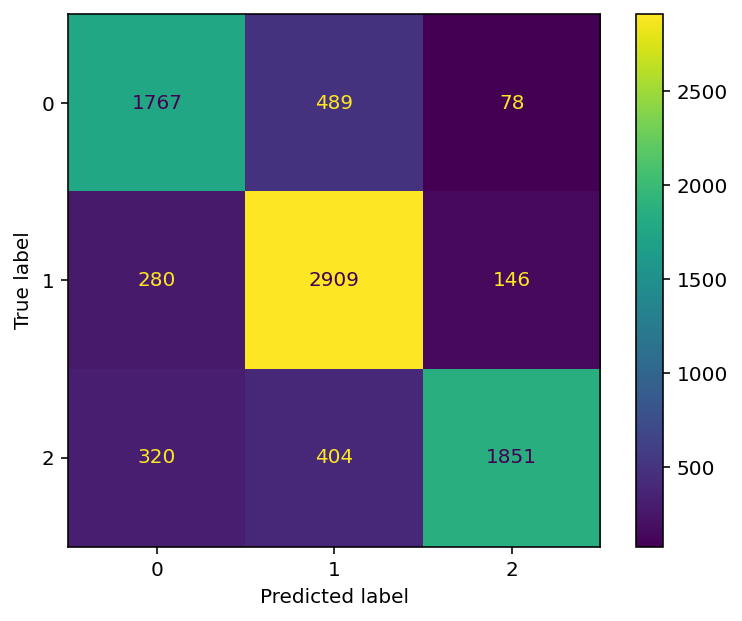

In [48]:
# Fit Random Forest classifier
rfc = RandomForestClassifier(max_depth=100)
rfc.fit(X_train_vec, y_train)

# Predicting and evaluating
y_pred = rfc.predict(X_test_vec)

print("Train accuracy:", rfc.score(X_train_vec,y_train))
print("Test accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_estimator(rfc, X_test_vec, y_test)
plt.show()

## Dataset 2 ("selected_text") + Naive Bayes Classifier

Train accuracy: 0.8526200873362445
Test accuracy: 0.7785055798156235
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.57      0.71      2334
           1       0.67      0.96      0.79      3335
           2       0.93      0.73      0.82      2575

    accuracy                           0.78      8244
   macro avg       0.84      0.75      0.77      8244
weighted avg       0.82      0.78      0.78      8244



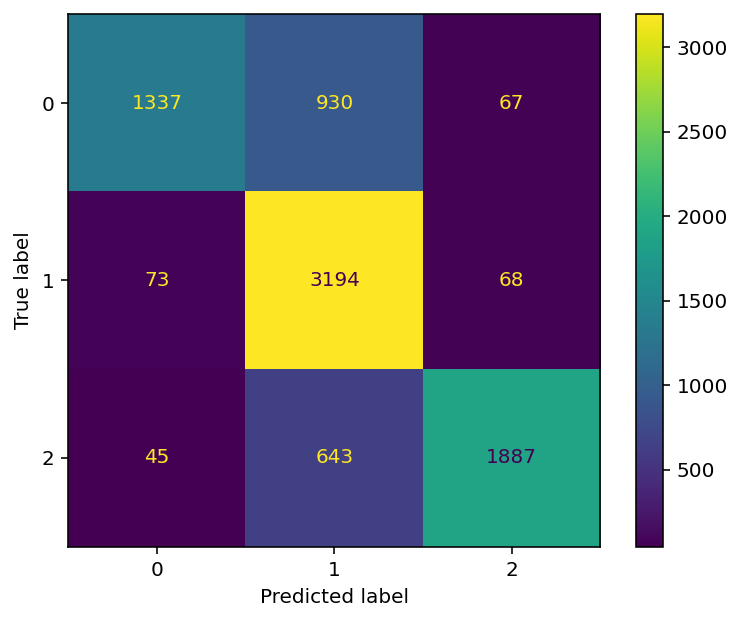

In [49]:
# Fit Naive Bayes classifier
est = MultinomialNB()
est.fit(X_train_vec, y_train)

# Predicting and evaluating
y_pred = est.predict(X_test_vec)

print("Train accuracy:", est.score(X_train_vec,y_train))
print("Test accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_estimator(est, X_test_vec, y_test)
plt.show()

## Dataset 2 ("selected_text") + Support Vector Classifier ⭐️

Train accuracy: 0.963297982948638
Test accuracy: 0.834061135371179
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.77      0.80      2334
           1       0.78      0.91      0.84      3335
           2       0.93      0.80      0.86      2575

    accuracy                           0.83      8244
   macro avg       0.85      0.82      0.83      8244
weighted avg       0.84      0.83      0.83      8244



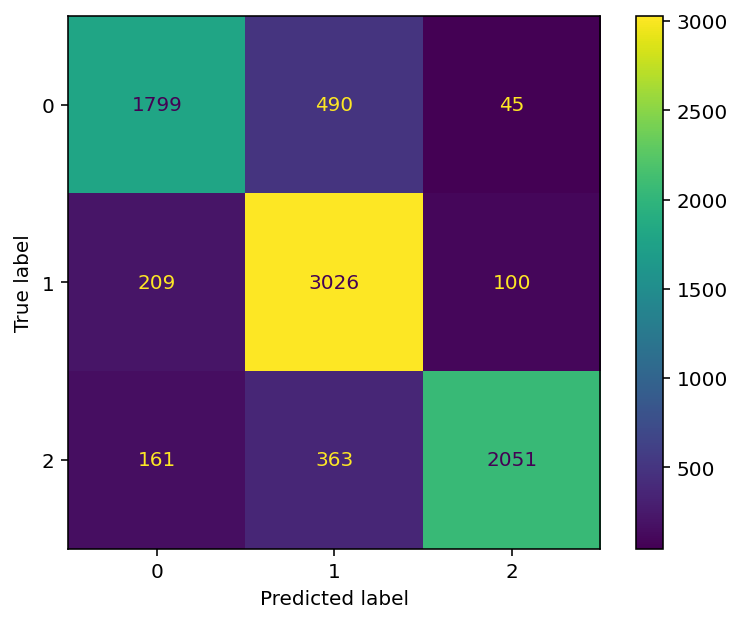

In [50]:
# Fit support vector classifier (slow)
est = SVC()
est.fit(X_train_vec, y_train)

# Predicting and evaluating
y_pred = est.predict(X_test_vec)

print("Train accuracy:", est.score(X_train_vec,y_train))
print("Test accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_estimator(est, X_test_vec, y_test)
plt.show()

# Comparison of baseline (untuned) models
<h4>Dataset 1 (two classes)</h4>
<table>
<tr>
<th>Model
<th>Train Acc
<th>Test Acc
<th>Best
</tr>
<tr>
<td>Decision Tree
<td>0.99
<td>0.67
<td>
</tr>
<tr>
<td>Log Reg
<td>0.84
<td>0.77
<td>⭐️
</tr>
<tr>
<td>SVC
<td>0.98
<td>0.74
<td>
</tr>
</table>
</br>
<h4>Dataset 2 (three classes, <code>selected_text</code>)</h4>
<table>
<tr>
<th>Model
<th>Train Acc
<th>Test Acc
<th>Best
</tr>
<tr>
<td>Decision Tree
<td>0.99
<td>0.75
<td>
</tr>
<tr>
<td>Random Forest
<td>0.94
<td>0.79
<td>
</tr>
<tr>
<td>Naive Bayes
<td>0.85
<td>0.77
<td>
</tr>
<tr>
<td>SVC
<td>0.96
<td>0.83
<td>⭐️
</tr>
</table>



# Top words visualization
Generate word cloud of top words and color by the word's most commonly associated sentiment (green = positive, red=negative, grey=neutral) - and scale words by their frequency.
- grey indicates the word was found in more tweets labeled neutral than anything else
- size of word indicates in how many tweets the word appeared

In [70]:
top_words = pd.Series(np.concatenate([x.lower().replace('`',"'").split() for x in df['selected_text']])).value_counts()
top_words.head(20)

i       7140
to      5270
the     4576
a       3521
my      2770
and     2303
you     2286
is      2082
in      1937
for     1848
it      1810
of      1631
on      1437
so      1360
have    1329
me      1248
but     1244
i'm     1195
that    1182
not     1163
Name: count, dtype: int64

In [81]:
# https://gist.github.com/brianteachman/4522951

ignored = pd.read_csv('ignored.csv')

In [90]:
filtered_top = top_words[~top_words.index.isin(ignored[.iloc[:,0]])]

In [91]:
filtered_top.head(20)

good      1075
love       865
happy      801
day        784
get        765
like       753
go         648
going      569
got        558
now        550
miss       515
work       487
really     486
will       483
u          481
****       474
one        473
im         460
can        440
see        422
Name: count, dtype: int64

In [87]:
len(filtered_top)

28477

In [111]:
top_words = filtered_top[:1000]
top_labeled = {}

# SLOW
for word, freq in top_words.items():
  top_labeled[word] = [0,0,0] # pos neg neut
  for tweet, label in zip(df['selected_text'],df['sentiment']):
    if word in tweet:
      if label == 'positive':
        top_labeled[word][0] += 1
      elif label == 'negative':
        top_labeled[word][1] += 1
      else:
        top_labeled[word][2] += 1

for word, counts in top_labeled.items():
  if counts[0] >= counts[1] and counts[0] >= counts[2]:
    top_labeled[word] = [counts, 'positive']
  elif counts[1] >= counts[0] and counts[1] >= counts[2]:
    top_labeled[word] = [counts, 'negative']
  else:
    top_labeled[word] = [counts, 'neutral']

In [112]:
# https://stackoverflow.com/questions/61919884/mapping-wordcloud-color-to-a-value-for-sentiment-analysis
# https://stackoverflow.com/questions/70883110/python-wordcloud-how-to-make-the-word-colour-based-on-a-data-column
class SimpleColorFunc(object):
    def __init__(self, words_to_colors, default_color):
        self.word_to_color = words_to_colors
        self.default_color = default_color

    def __call__(self, word, **kwargs):
        return self.word_to_color.get(top_labeled[word][1], self.default_color)

In [113]:
def plot_word_cloud_dict_colormapped(d, color_fun, title):
  plt.style.use("dark_background")
  wordcloud = WordCloud(collocations=False,width=1600, height=800, prefer_horizontal=1).generate_from_frequencies(d)
  wordcloud.recolor(color_func=color_fun)
  # plot the WordCloud image
  plt.figure(figsize=(14,10))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.title(title)
  plt.show()

In [114]:
label_colors = {
    'positive': '#04d104',
    'negative': '#d20303',
    'neutral': '#444444'
}

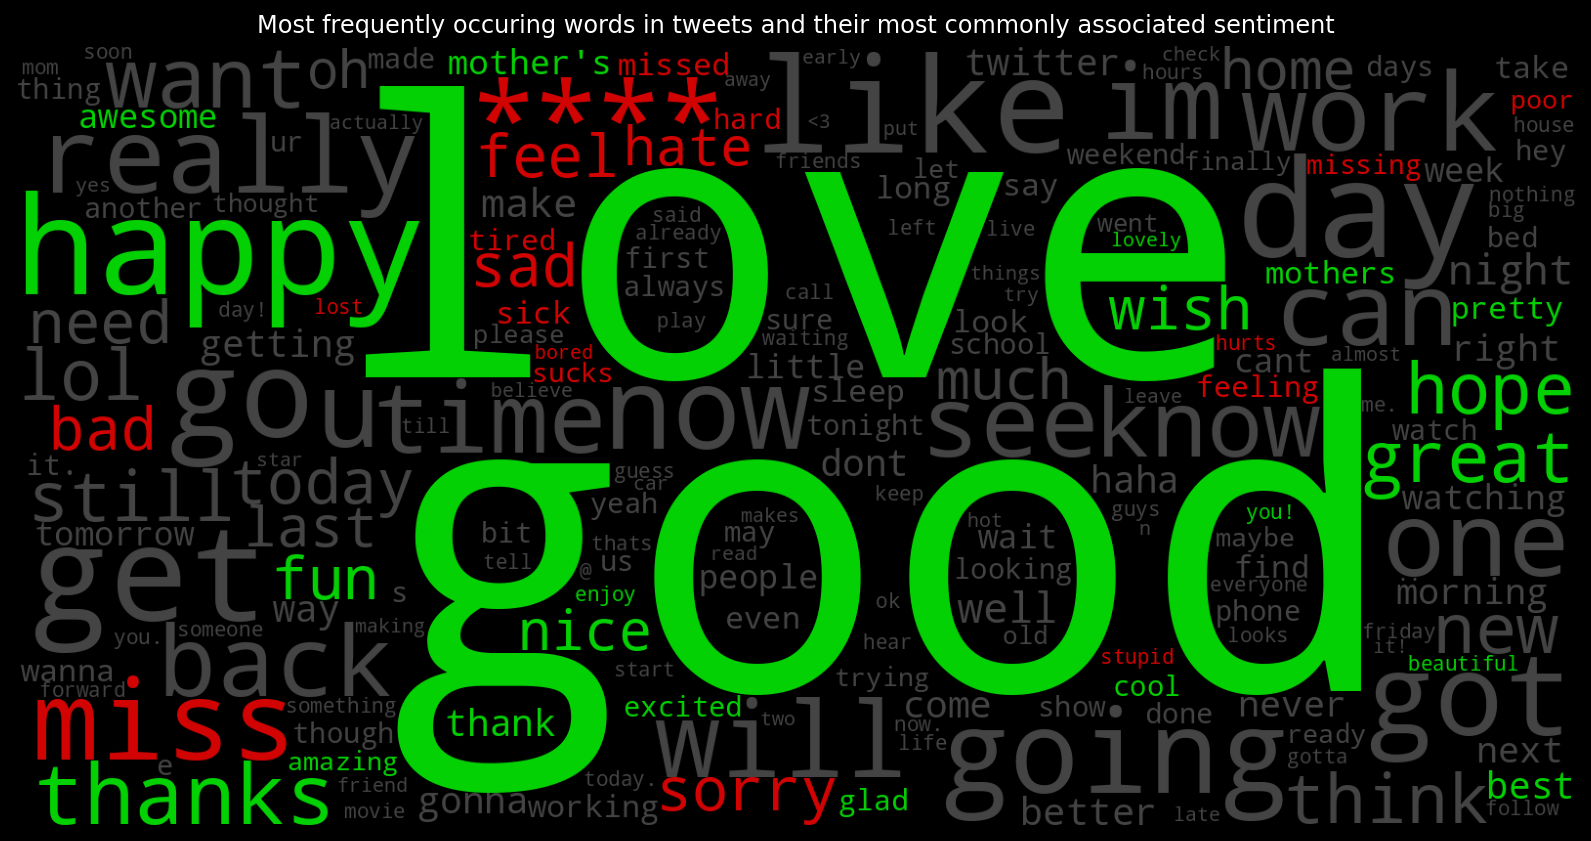

In [115]:
color_func= SimpleColorFunc(label_colors, '#000000')

plot_word_cloud_dict_colormapped(top_words,color_func,'Most frequently occuring words in tweets and their most commonly associated sentiment')

In [116]:
pd.Series([val[1] for key, val in top_labeled.items()]).value_counts()

neutral     805
positive    101
negative     94
Name: count, dtype: int64

# TO DO
Praveen meeting
Reducing dimensionality
- TSNE
- UMAP down to 2D to visualize class boundary

Params for SVC
- Gamma - radius
- Slack

<u>To Do:</u>
- Wrap the repetitive steps into a function that takes the model as an argument
- Display a nice decision tree with not too many levels for powerpoint
- Tune SVC+DB2 model using cross validation
- Use UMAP to generate a nice 2D scatterplot showing the decision boundary ✅
- Powerpoint
- Readme
- Apply logistic classification to the cleanest UMAP data
- Examples of tweets classified as positive and negative

# Visualizations

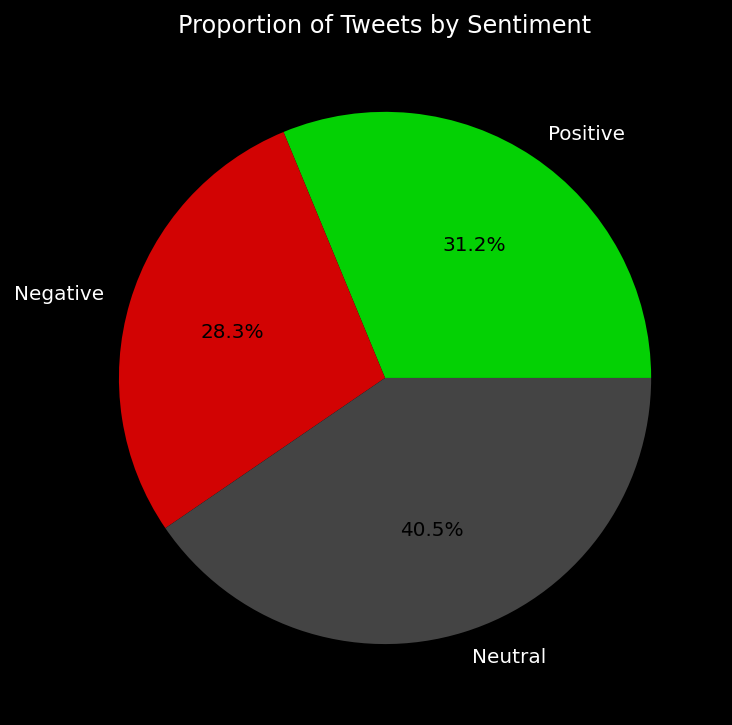

In [117]:
# Pie chart - proportions of sentiment
used_percent = []
cats = ['positive', 'negative','neutral']
for x in cats:
  used_percent.append(100*len(df[df['sentiment'] == x])/len(df))
plt.style.use("dark_background")
plt.figure(figsize=(6,6))

def func(pct):
    return f"{pct:.1f}%"

# https://stackoverflow.com/questions/27898830/python-how-to-change-autopct-text-color-to-be-white-in-a-pie-chart
_, _, autotexts = plt.pie(labels=['Positive','Negative','Neutral'],x=used_percent, autopct=func, colors=label_colors.values())
for autotext in autotexts:
    autotext.set_color('black')

plt.title('Proportion of Tweets by Sentiment')
plt.show()

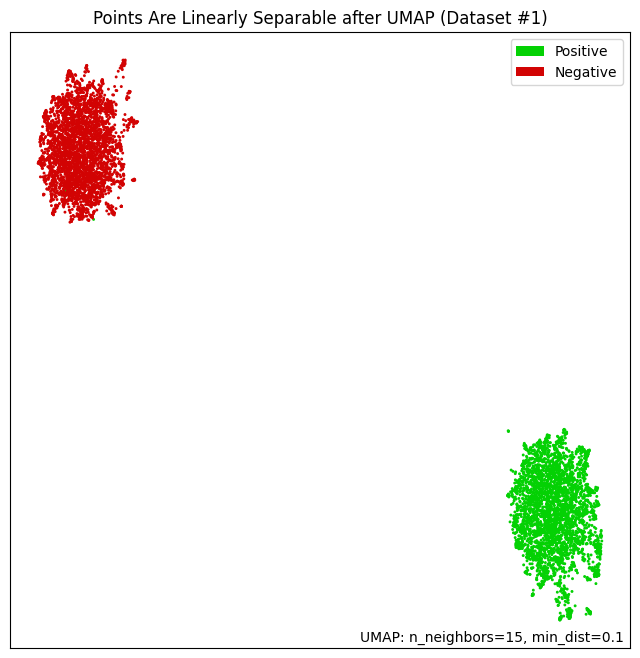

In [124]:
# UMAP Dimensionality Reduction on Dataset 1 - SLOW
mapper = umap.UMAP(random_state=42).fit(X_train_vec, y_train)

# UMAP scatterplot
plt.style.use("default")
umap.plot.points(mapper, labels=y_train, color_key={0: '#d20303', 4: '#04d104'})
plt.title('Points Are Linearly Separable after UMAP (Dataset #1)')
legend_elements = [Patch(facecolor='#04d104', label='Positive'),Patch(facecolor='#d20303', label='Negative')]
plt.legend(handles=legend_elements)
plt.show()